## Review (2)

Thank you for fast update. Everything is great now. So I'm accepting your project. I left you just one yellow comment near top 10 locations task. Please have a look at it. Good luck.

---

## Review

Hi Julia. This is Soslan again. I'm reviewing your next project. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

I didn't finish to review your project as I found an important mistake. You deleted too much data (about 70%) when was working with outliers. Till that moment everything was correct. I decided not to look through rest of the project as the analysis there heavily depends from data you prepared.

---

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [162]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data_eng.csv',sep='\t')

In [163]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony     locality_name  airports_nearest  \
0          25.0      NaN   Saint Peterburg           18863.0   
1     

In [164]:
print(data['studio'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: studio, Length: 23699, dtype: bool


In [165]:
print(data['open_plan'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: open_plan, Length: 23699, dtype: bool


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Conclusion

### There are 23699 rows. There are some missing values in 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', and 'days_exposition'. 

<div class="alert alert-success" role="alert">
Good start
</div>

### Step 2. Data preprocessing

In [167]:
data['ceiling_height'] = data['ceiling_height'].fillna(-1)

In [168]:
data['floors_total'] = data['floors_total'].fillna(-1)

In [169]:
data['floor'] = data['floor'].fillna(-1)

In [170]:
data['living_area'] = data['living_area'].fillna(-1)

In [171]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [172]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)

In [173]:
data['balcony'] = data['balcony'].fillna(0)

In [174]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [175]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)

In [176]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [177]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [178]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [179]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [180]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [181]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

### For most columns ('ceiling_height', 'floors_total', 'floor', 'living_area', 'kitchen_area','days_exposition' ), I replaced missing values with -1 because then I can change to the int data type and also chose to ignore these values in future calculations by doing, for example, data[data.floors_total != -1].mean(). I could not replace them with a string 'unknown' because then the data type would not allow calculations. For 'is_apartment', I replaced missing values with False, since it is probably not an apartment if it is not specified in the advertisement. For 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', and 'ponds_nearest', I replaced missing values with 0 since this means there are no parks/ponds/balconies, etc. for that house. Also, for 'locality_name', I replaced missing values with 'unknown', since all of the data types in this column are also strings of city names. 

<div class="alert alert-success" role="alert">
You desided not to add any skew to your data, this is OK.</div>

In [183]:
data['last_price'] = data['last_price'].astype('int')

In [184]:
#data['total_area'] = data['total_area'].astype('int')

In [185]:
data['datetime_ad_published']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [186]:
print(data['datetime_ad_published'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: datetime_ad_published, dtype: datetime64[ns]


In [187]:
#data['ceiling_height'] = data['ceiling_height'].astype('int')

In [188]:
data['floors_total'] = data['floors_total'].astype('int')

In [189]:
#data['living_area'] = data['living_area'].astype('int')

In [190]:
#data['kitchen_area'] = data['kitchen_area'].astype('int')

In [191]:
data['balcony'] = data['balcony'].astype('int')

In [192]:
data['airports_nearest'] = data['airports_nearest'].astype('int')

In [193]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

In [194]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [195]:
data['parks_nearest'] = data['parks_nearest'].astype('int')

In [196]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [197]:
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [198]:
data['days_exposition'] = data['days_exposition'].astype('int')

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23699 non-null int64
last_price               23699 non-null int64
total_area               23699 non-null float64
first_day_exposition     23699 non-null object
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23699 non-null int64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23699 non-null float64
balcony                  23699 non-null int64
locality_name            23699 non-null object
airports_nearest         23699 non-null int64
cityCenters_nearest      23699 non-null int64
parks_around3000         23699 non-null int64
parks_nearest            23699 non-null int64
ponds_arou

In [200]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0  2019-03-07T00:00:00      3   
1             7     3350000        40.4  2018-12-04T00:00:00      1   
2            10     5196000        56.0  2015-08-20T00:00:00      2   
3             0    64900000       159.0  2015-07-24T00:00:00      3   
4             2    10000000       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1           -1.00            11         18.6      1         False  ...   
2           -1.00             5         34.3      4         False  ...   
3           -1.00            14         -1.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   balcony     locality_name  airports_nearest  cityCenters_nearest  \
0        0   Saint Peterburg             18863           

### Most columns with float data types needed to be changed to int to allow easy calculations since they did not include decimal values. However, 'ceiling_height', 'kitchen_area', 'living_area', and 'total_area' included decimal values so I left them in the float data type. Also, I changed the string that contained the publication date of the advertisement to datetime and saved that to a new column called 'datetime_ad_published'. 

<div class="alert alert-success" role="alert">
Overall good work with missed values and data types</div>

### Step 3. Make calculations and add them to the table

In [201]:
data['price_per_square_meter'] = data['last_price'] / data['total_area'][data['total_area'] != -1]

In [202]:
data['day_of_week']= data['datetime_ad_published'].dt.weekday
data['month']= data['datetime_ad_published'].dt.month
data['year']= data['datetime_ad_published'].dt.year

In [203]:
print(data['day_of_week'].min())
print(data['day_of_week'].max())

0
6


In [204]:
print(data['month'].min())
print(data['month'].max())

1
12


In [205]:
print(data['year'].min())
print(data['year'].max())

2014
2019


In [206]:
def floor_compare(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1: 
        return 'first'
    if floor == floors_total:
        return 'last'
    else:
        return 'other'

data['floor_comparison_to_total'] = data.apply(floor_compare, axis=1)


In [207]:
data['area_ratio_living_total'] = data['living_area'][data['living_area'] != -1] / data['total_area'][data['total_area'] != -1]

In [208]:
data['area_ratio_living_total'] = data['area_ratio_living_total'].fillna(-1)

In [209]:
data['area_ratio_kitchen_total'] = data['kitchen_area'][data['kitchen_area'] != -1] / data['total_area'][data['total_area'] != -1]

In [210]:
data['area_ratio_kitchen_total'] = data['area_ratio_kitchen_total'].fillna(-1)

In [211]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0  2019-03-07T00:00:00      3   
1             7     3350000        40.4  2018-12-04T00:00:00      1   
2            10     5196000        56.0  2015-08-20T00:00:00      2   
3             0    64900000       159.0  2015-07-24T00:00:00      3   
4             2    10000000       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1           -1.00            11         18.6      1         False  ...   
2           -1.00             5         34.3      4         False  ...   
3           -1.00            14         -1.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   ponds_nearest  days_exposition  datetime_ad_published  \
0            755               -1             2019-03-07   
1       

In [212]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                 23699 non-null int64
last_price                   23699 non-null int64
total_area                   23699 non-null float64
first_day_exposition         23699 non-null object
rooms                        23699 non-null int64
ceiling_height               23699 non-null float64
floors_total                 23699 non-null int64
living_area                  23699 non-null float64
floor                        23699 non-null int64
is_apartment                 23699 non-null bool
studio                       23699 non-null bool
open_plan                    23699 non-null bool
kitchen_area                 23699 non-null float64
balcony                      23699 non-null int64
locality_name                23699 non-null object
airports_nearest             23699 non-null int64
cityCenters_nearest          23699 non-null int64
parks_around3000             23699

In [213]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0  2019-03-07T00:00:00      3   
1             7     3350000        40.4  2018-12-04T00:00:00      1   
2            10     5196000        56.0  2015-08-20T00:00:00      2   
3             0    64900000       159.0  2015-07-24T00:00:00      3   
4             2    10000000       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1           -1.00            11         18.6      1         False  ...   
2           -1.00             5         34.3      4         False  ...   
3           -1.00            14         -1.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   ponds_nearest  days_exposition  datetime_ad_published  \
0            755               -1             2019-03-07   
1       

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                 23699 non-null int64
last_price                   23699 non-null int64
total_area                   23699 non-null float64
first_day_exposition         23699 non-null object
rooms                        23699 non-null int64
ceiling_height               23699 non-null float64
floors_total                 23699 non-null int64
living_area                  23699 non-null float64
floor                        23699 non-null int64
is_apartment                 23699 non-null bool
studio                       23699 non-null bool
open_plan                    23699 non-null bool
kitchen_area                 23699 non-null float64
balcony                      23699 non-null int64
locality_name                23699 non-null object
airports_nearest             23699 non-null int64
cityCenters_nearest          23699 non-null int64
parks_around3000             23699

### I created a new column 'price_per_square_meter', which shows the price per square meter. When changing data types, I changed the string that contained the publication date of the advertisement to datetime and saved that to a new column called 'datetime_ad_published', which shows the day of the week, month, and year that the ad was published. From this, I created 'day_of_week', 'month', and 'year' columns.  I added a 'floor_comparison_to_total' column, which says which floor the apartment is on (first, last, or other).  I also added the 'area_ratio_living_total' column (which shows the ratio between the living space and the total area) and the 'area_ratio_kitchen_total' column (which shows the ratio between the kitchen space and the total area).

<div class="alert alert-success" role="alert">
Correct third step, nothing to add
</div>

### Step 4. Conduct exploratory data analysis and follow the instructions below:

In [215]:
#square area, price, number of rooms, and ceiling height

In [216]:
import matplotlib.pyplot as plt

## total_area

In [217]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

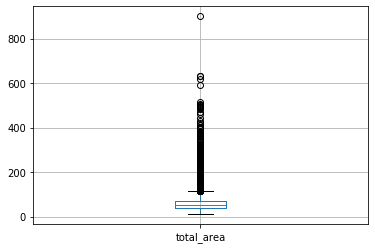

In [218]:
data.boxplot(column='total_area')

In [219]:
print(data['total_area'].min())
print(data['total_area'].max())
print(len(data['total_area'].unique()))

12.0
900.0
2182


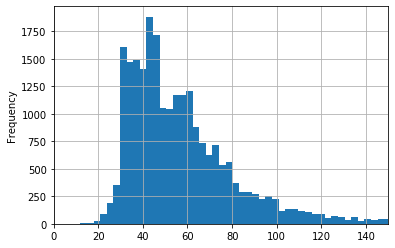

In [220]:
data['total_area'].plot(kind='hist', label='total_area', xlim=(0,150), bins=300, grid=True)

### total_area has a lot of outliers above about 80.

## last_price

In [221]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

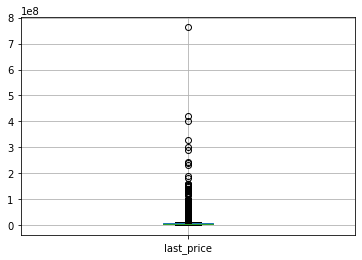

In [222]:
data.boxplot(column='last_price')

In [223]:
print(data['last_price'].min())
print(data['last_price'].max())
print(len(data['last_price'].unique()))

12190
763000000
2978


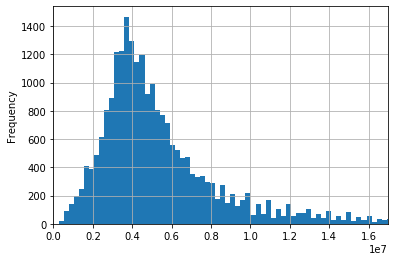

In [224]:
data['last_price'].plot(kind='hist', label='last_price', xlim=(0,1.7e+07), bins=len(data['last_price'].unique()), grid=True)

### last_price has a lot of outliers above about 0.8e+7.

## rooms

In [225]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

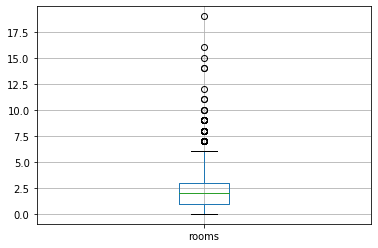

In [226]:
data.boxplot(column='rooms')

In [227]:
print(data['rooms'].min())
print(data['rooms'].max())
print(len(data['rooms'].unique()))

0
19
17


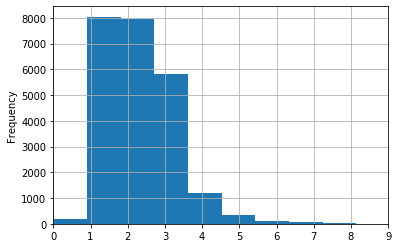

In [228]:
data['rooms'].plot(kind='hist', label='rooms', xlim=(0,9), bins=21, grid=True)

### Most houses have between 1 and 3 rooms.

## ceiling_height

In [229]:
data['ceiling_height'][data['ceiling_height'] != -1].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

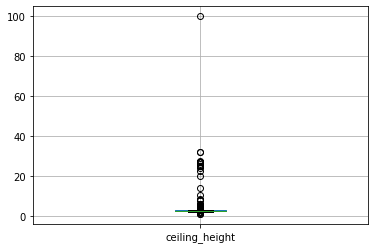

In [230]:
data[data['ceiling_height'] != -1].boxplot(column='ceiling_height')

In [231]:
print(data['ceiling_height'][data['ceiling_height'] != -1].min())
print(data['ceiling_height'][data['ceiling_height'] != -1].max())
print(len(data['ceiling_height'][data['ceiling_height'] != -1].unique()))

1.0
100.0
183


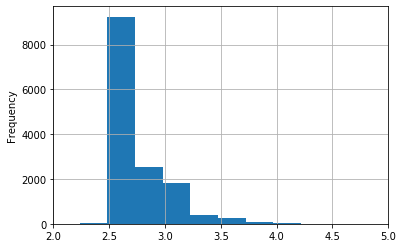

In [232]:
data['ceiling_height'][data['ceiling_height'] != -1].plot(kind='hist', label='ceiling_height', xlim=(2,5) ,bins=400,  grid=True)

### ceiling_height is between 2.25 and 3 for most of the homes.

### In all of these, there are a lot of outliers that can create noise in the data.

<div class="alert alert-success" role="alert">
Good analysis of data and outliers but I think your outliers borders are too strict.</div>

## Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?

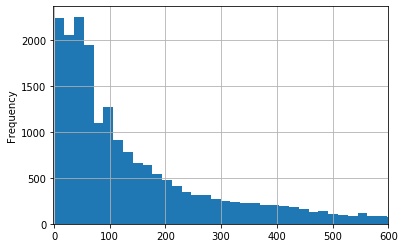

In [233]:
data['days_exposition'][data['days_exposition'] != -1].plot(kind='hist', label='days_exposition' , xlim=(-1,600), bins= 90, grid=True)

### There are less homes with higher prices represented in the data, compared to homes with lower prices, which make up the bulk of the data.

In [234]:
print(data['days_exposition'][data['days_exposition'] != -1].mean())

180.88863436982163


In [235]:
print(data['days_exposition'][data['days_exposition'] != -1].median())

95.0


### Since the mean (180.89) is so much higher than the median (95), there are outliers that are much higher than the rest of the data as the histogram shows and this skews the data.

In [236]:
data['days_exposition'][data['days_exposition'] != -1].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### A sale can be considered extra quick if it takes less than 45 days (fastest 25% of data) and can be considered extra slow if it takes more than 232 days (slowest 25% of data). 

<div class="alert alert-success" role="alert">
Great
</div>

# Remove rare and outlying values and describe the specific details you've discovered.

## last_price

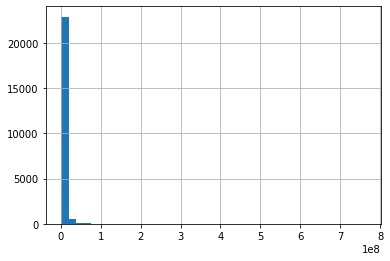

In [237]:
data['last_price'].hist(bins=40)

In [238]:
data = data[data['last_price'] <= 2e+8]

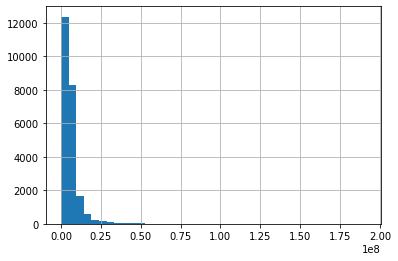

In [239]:
data['last_price'].hist(bins=40)

## cityCenters_nearest

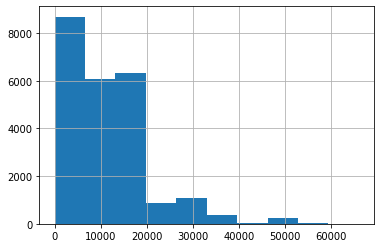

In [240]:
data['cityCenters_nearest'].hist()

In [241]:
data = data[data['cityCenters_nearest'] <= 55000]

In [242]:
data = data[data['cityCenters_nearest'] >= 0]

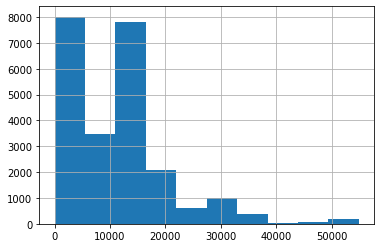

In [243]:
data['cityCenters_nearest'].hist()

## price_per_square_meter

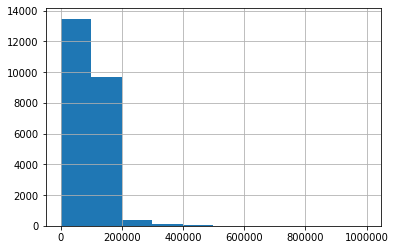

In [244]:
data['price_per_square_meter'].hist()

In [245]:
data = data[data['price_per_square_meter'] <= 240000]

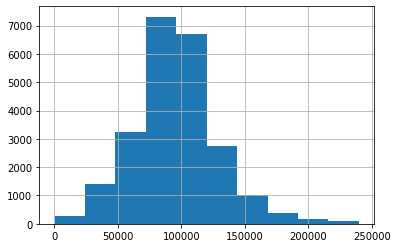

In [246]:
data['price_per_square_meter'].hist()

## day_of_week

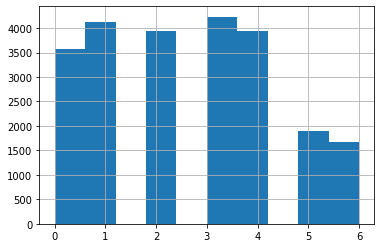

In [247]:
data['day_of_week'].hist()

## year

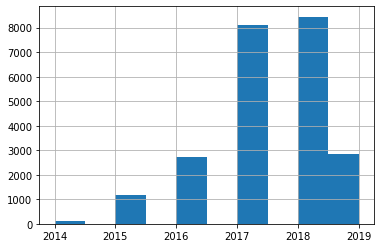

In [248]:
data['year'].hist()

In [249]:
data = data[data['year'] >= 2015]

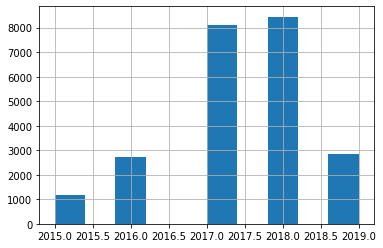

In [250]:
data['year'].hist()

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23253 entries, 0 to 23698
Data columns (total 30 columns):
total_images                 23253 non-null int64
last_price                   23253 non-null int64
total_area                   23253 non-null float64
first_day_exposition         23253 non-null object
rooms                        23253 non-null int64
ceiling_height               23253 non-null float64
floors_total                 23253 non-null int64
living_area                  23253 non-null float64
floor                        23253 non-null int64
is_apartment                 23253 non-null bool
studio                       23253 non-null bool
open_plan                    23253 non-null bool
kitchen_area                 23253 non-null float64
balcony                      23253 non-null int64
locality_name                23253 non-null object
airports_nearest             23253 non-null int64
cityCenters_nearest          23253 non-null int64
parks_around3000             23253

In [252]:
print((23699-23253)/23699 *100, '% of data was deleted.')

1.881935946664416 % of data was deleted.


### I deleted about 2% of data.

<div class="alert alert-danger" role="alert">
<s>You deleted about 70% of your data. I think this is not a good idea. Mostly because you fill some of the missed values as -1 and here this data was considered as outliers. For example by cleaning the ceiling_height parameter you deleted almost half of the data. You should be careful and check how many data rows you're deleting. It is not necessary to clean outliers for each parameter only for several main.</s></div>

<div class="alert alert-success" role="alert">
Fixed</div>

## In each factor, I used histograms to identity which values occur as outliers or considerably less frequently than other values in this data set, and I removed them from 'data'.

# Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year.  
 

In [253]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,area_ratio_living_total,area_ratio_kitchen_total
total_images,1.000000,0.147093,0.108852,0.093369,0.095399,0.017981,0.124310,0.032886,0.016817,-0.029444,...,0.030109,0.007221,0.009036,-0.052274,0.149856,-0.010724,0.007698,0.141851,0.093476,0.095446
last_price,0.147093,1.000000,0.842968,0.537066,0.108219,0.040381,0.622152,0.060604,0.035310,-0.045066,...,0.197139,0.256782,0.145586,0.059492,0.580980,-0.011602,-0.001828,-0.020504,-0.009742,0.002712
total_area,0.108852,0.842968,1.000000,0.769212,0.091631,-0.069798,0.782878,-0.027299,0.030963,-0.076769,...,0.119199,0.176455,0.083479,0.085409,0.169118,-0.008632,-0.001332,-0.059424,0.012305,-0.019960
rooms,0.093369,0.537066,0.769212,1.000000,0.094877,-0.225940,0.744911,-0.154720,0.002410,-0.149179,...,0.082187,0.109646,0.054309,0.072013,-0.041085,-0.005771,-0.009233,-0.042971,0.112865,-0.035790
ceiling_height,0.095399,0.108219,0.091631,0.094877,1.000000,-0.089800,0.142085,-0.068056,0.055089,-0.013587,...,0.037727,0.057416,0.028647,0.014940,0.096785,-0.046570,-0.025967,0.156419,0.122845,0.102429
floors_total,0.017981,0.040381,-0.069798,-0.225940,-0.089800,1.000000,-0.147924,0.665035,-0.023335,0.066608,...,-0.061100,-0.042596,0.018375,-0.023040,0.272850,0.010964,0.017188,0.004970,-0.087926,0.032582
living_area,0.124310,0.622152,0.782878,0.744911,0.142085,-0.147924,1.000000,-0.089564,0.017661,-0.048930,...,0.097166,0.142487,0.074452,0.094634,0.080766,-0.022049,0.000831,-0.076802,0.509953,0.226367
floor,0.032886,0.060604,-0.027299,-0.154720,-0.068056,0.665035,-0.089564,1.000000,-0.012694,0.036940,...,-0.038396,-0.026119,0.015188,-0.020539,0.215584,0.011096,0.018831,0.003072,-0.061171,0.023600
is_apartment,0.016817,0.035310,0.030963,0.002410,0.055089,-0.023335,0.017661,-0.012694,1.000000,-0.003497,...,-0.012467,0.011081,0.015221,-0.001742,0.019936,-0.007236,-0.001240,0.018495,-0.012208,-0.033814
studio,-0.029444,-0.045066,-0.076769,-0.149179,-0.013587,0.066608,-0.048930,0.036940,-0.003497,1.000000,...,-0.022938,-0.008455,-0.004494,-0.016926,0.032643,-0.000891,0.001643,0.010625,0.023703,-0.241938


### Total area, rooms, living_area, and price per square meter seem to impact price the most.

<div class="alert alert-success" role="alert">
Not a surprise :)
</div>

## price_per_square_meter

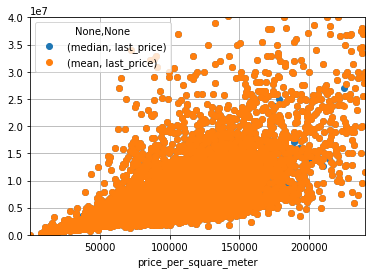

In [255]:
data.pivot_table(index=['price_per_square_meter'], values='last_price', aggfunc=['median', 'mean']).plot( ylim=(0,0.4e+8),style='o', grid=True)

### As price per square meter increases, the price increases. This makes sense.

## rooms

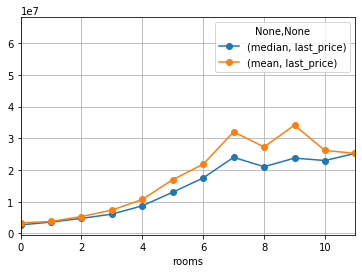

In [256]:
data.pivot_table(index=['rooms'], values='last_price', aggfunc=['median', 'mean']).plot(xlim=(0,11),style='o-', grid=True)

### A number of rooms increases from 0 to 7 rooms, price increases. There are some outliers starting at 7 rooms, since not many people have so many rooms.

## floor rank

In [257]:
data.pivot_table(index=['floor_comparison_to_total'], values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
floor_comparison_to_total,,,
first,3900000,4.591491e+06,2879
last,4287500,5.943886e+06,3264
other,4800000,6.044114e+06,17110


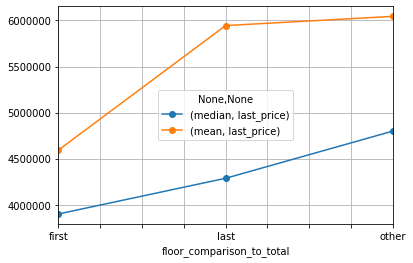

In [258]:
data.pivot_table(index=['floor_comparison_to_total'], values='last_price', aggfunc=['median', 'mean']).plot( style='o-', grid=True)

### It seems that if some lives on the first floor, it costs less than if someone lives on the last floor.

<div class="alert alert-success" role="alert">
Looks reasonable
</div>

## cityCenters_nearest

In [259]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [260]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

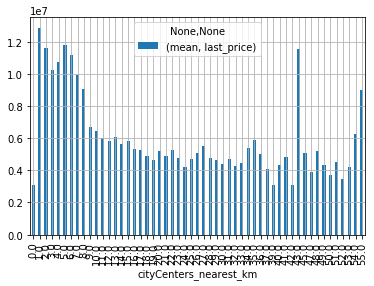

In [261]:
data.pivot_table(index=['cityCenters_nearest_km'], values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True)

### It seems that homes between about 1 and 8 km away from the city center (downtown area) are more expensive than homes that are farther away from the city. 

## day_of_week

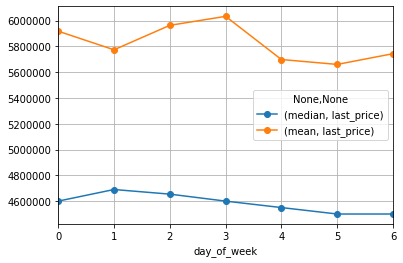

In [262]:
data.pivot_table(index=['day_of_week'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### The day of the week of the publication date does not show much effect on price. It seems pretty constant.

## month

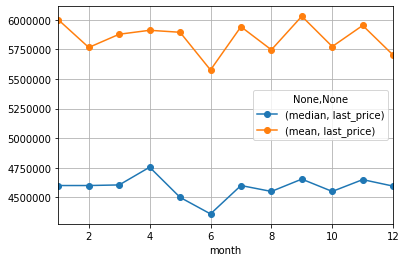

In [263]:
data.pivot_table(index=['month'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### It seems like price is pretty constant depending on month. However, in June, the price is the lowest.

## year

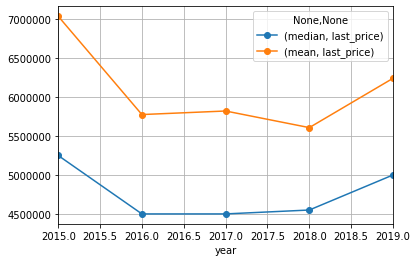

In [264]:
data.pivot_table(index=['year'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### Prices have decreased from 2015 to 2016, stayed pretty constant from 2016 to 2017, and increased from 2017 to 2019.

### The factor with the largest influence on a home's value is the price per square meter. However, the number of rooms, whether the home is on first or last floor, the distance to the city center, and the year also play a part.

<div class="alert alert-success" role="alert">
Correct
</div>

# Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.

In [265]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,datetime_ad_published,price_per_square_meter,day_of_week,month,year,floor_comparison_to_total,area_ratio_living_total,area_ratio_kitchen_total,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,-1,2019-03-07,120370.370370,3,3,2019,other,0.472222,0.231481,16.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,-1.00,11,18.6,1,False,...,81,2018-12-04,82920.792079,1,12,2018,first,0.460396,0.272277,19.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,-1.00,5,34.3,4,False,...,558,2015-08-20,92785.714286,3,8,2015,other,0.612500,0.148214,14.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,121,2018-06-19,100000.000000,1,6,2018,other,0.320000,0.410000,8.0
5,10,2890000,30.4,2018-09-10T00:00:00,1,-1.00,12,14.4,5,False,...,55,2018-09-10,95065.789474,0,9,2018,other,0.473684,0.299342,0.0


In [266]:
data['locality_name'] = data['locality_name'].str.lower()

In [267]:
data['locality_name'].value_counts().sort_values(ascending=False).head(10)

saint peterburg      15327
murino village         554
shushary village       440
vsevolozhsk            393
pushkin                364
kolpino                334
pargolovo village      326
gatchina               307
kudrovo village        298
vyborg                 237
Name: locality_name, dtype: int64

In [268]:
data.query('locality_name == "saint peterburg"')['price_per_square_meter'].mean()

109706.71671919581

In [269]:
top10 = {'locality_name':  ['saint peterberg', 'vsevolozhsk','shushary village', 'kolpino', 'pushkin', 'gatchina', 'murino village', 'novoye devyatkino village', 'pargolovo village', 'krasnoye selo'],
        'average_price_per_square_meter_in_locality': [data.query('locality_name == "saint peterburg"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "vsevolozhsk"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "shushary village"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "kolpino"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "pushkin"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "gatchina"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "murino village"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "novoye devyatkino village"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "pargolovo village"')['price_per_square_meter'].mean(), 
                                                      data.query('locality_name == "krasnoye selo"')['price_per_square_meter'].mean()]
        }
top10_data = pd.DataFrame (top10, columns = ['locality_name','average_price_per_square_meter_in_locality'])

In [278]:
print(top10_data.sort_values(by='average_price_per_square_meter_in_locality', ascending=False))

               locality_name  average_price_per_square_meter_in_locality
0            saint peterberg                               109706.716719
4                    pushkin                               102607.563462
8          pargolovo village                                90135.075586
6             murino village                                85764.068370
2           shushary village                                78677.364217
7  novoye devyatkino village                                76206.001423
3                    kolpino                                75399.668554
9              krasnoye selo                                72148.588289
5                   gatchina                                68746.146763
1                vsevolozhsk                                67285.063663


<div class="alert alert-warning" role="alert">
That is why hardcoding values is not a good idea. Your data changed, your top 10 locations by the number of ads changes, and you should change manually top10 data. It is better to use .groupby() or .pivot_table() in such tasks. Next code helps you automate the process.
</div>

``
data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=('count', 'mean')) \
.sort_values('count', ascending=False).head(10)
``

---

### The location with the highest prices is Saint Peterberg. The location with the lowest prices is Vsevolozhsk.

# Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown.

In [280]:
saint_petersburg_data = data.query('locality_name == "saint peterburg"')

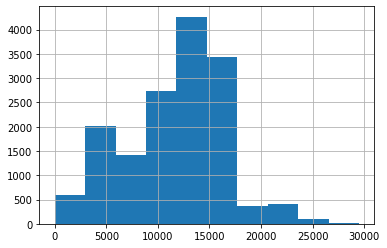

In [281]:
saint_petersburg_data['cityCenters_nearest'].hist()

In [282]:
saint_petersburg_data['cityCenters_nearest_km'] = saint_petersburg_data['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
saint_petersburg_data['cityCenters_nearest_km'] = saint_petersburg_data['cityCenters_nearest_km'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


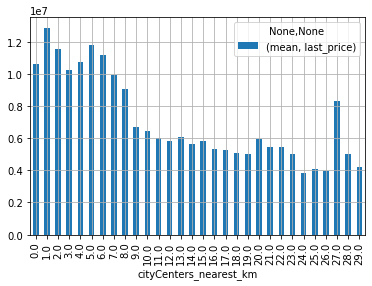

In [284]:
saint_petersburg_data.pivot_table(index=['cityCenters_nearest_km'], values='last_price', aggfunc=['mean']).plot( kind='bar', grid=True)

### There is a drop in price after 8km so downtown is considered 8 miles around city center.

In [285]:
distance_downtown_km = (data['cityCenters_nearest'] - 8000)/1000

In [286]:
distance_downtown_km_rounded= distance_downtown_km.round()

In [287]:
saint_petersburg_data['distance_to_downtown_km'] = distance_downtown_km.round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [288]:
print(saint_petersburg_data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0  2019-03-07T00:00:00      3   
2            10     5196000        56.0  2015-08-20T00:00:00      2   
4             2    10000000       100.0  2018-06-19T00:00:00      2   
7             5     7915000        71.6  2019-04-18T00:00:00      2   
9            18     5400000        61.0  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
2           -1.00             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
7           -1.00            24         -1.0     22         False  ...   
9            2.50             9         43.6      7         False  ...   

   datetime_ad_published  price_per_square_meter  day_of_week  month  year  \
0             2019-03-07           120370.370370  

In [289]:
saint_petersburg_data.pivot_table(index=['distance_to_downtown_km'], values='last_price', aggfunc=['mean'])

,mean
,last_price
distance_to_downtown_km,
-8.0,1.062751e+07
-7.0,1.288025e+07
-6.0,1.156471e+07
-5.0,1.025761e+07
-4.0,1.073761e+07
-3.0,1.179904e+07
-2.0,1.116790e+07
-1.0,9.908654e+06


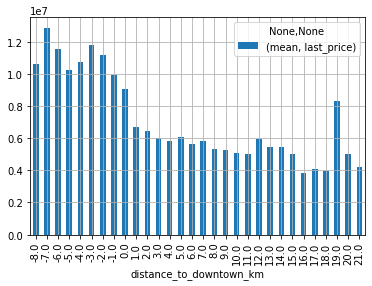

In [290]:
saint_petersburg_data.pivot_table(index=['distance_to_downtown_km'], values='last_price', aggfunc=['mean']).plot( kind='bar', grid=True)

### The graph significantly changes after 8 km from the center so this 8km radius indicates downtown.

<div class="alert alert-success" role="alert">
Agree, looks reasonable
</div>

# Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. 

In [291]:
saint_petersburg_downtown_data = saint_petersburg_data.query('cityCenters_nearest_km <= 8')

## total_area

In [292]:
saint_petersburg_downtown_data['total_area'].describe()

count    3872.00000
mean       86.04836
std        53.23416
min        12.00000
25%        53.07500
50%        73.85000
75%       101.02500
max       631.20000
Name: total_area, dtype: float64

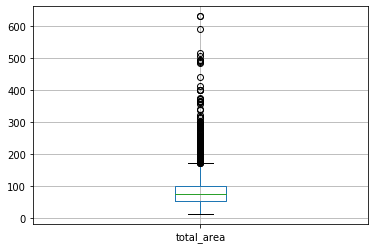

In [293]:
saint_petersburg_downtown_data.boxplot(column='total_area')

In [294]:
print(saint_petersburg_downtown_data['total_area'].min())
print(saint_petersburg_downtown_data['total_area'].max())
print(len(saint_petersburg_downtown_data['total_area'].unique()))

12.0
631.2
1183


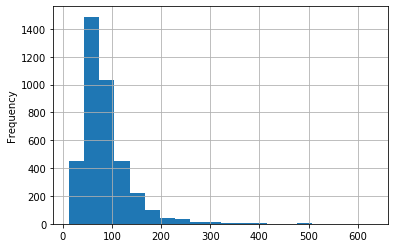

In [295]:
saint_petersburg_downtown_data['total_area'].plot(kind='hist', label='total_area', bins=20, grid=True)

### Most of the homes in the sample had a total_area between about 40 and 200 sq.m.

## last_price

In [296]:
saint_petersburg_downtown_data['last_price'].describe()

count    3.872000e+03
mean     1.081709e+07
std      8.543704e+06
min      1.600000e+06
25%      6.260500e+06
50%      8.500000e+06
75%      1.250000e+07
max      1.400000e+08
Name: last_price, dtype: float64

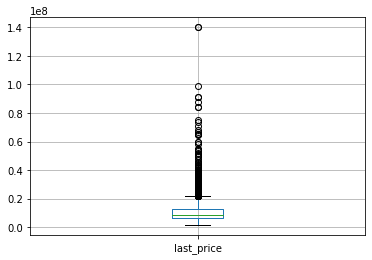

In [297]:
saint_petersburg_downtown_data.boxplot(column='last_price')

In [298]:
print(saint_petersburg_downtown_data['last_price'].min())
print(saint_petersburg_downtown_data['last_price'].max())
print(len(saint_petersburg_downtown_data['last_price'].unique()))

1600000
140000000
1173


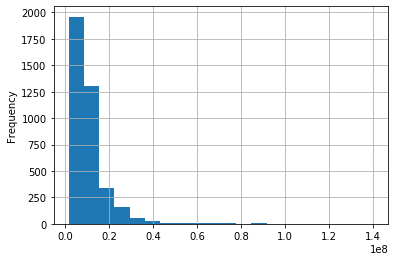

In [299]:
saint_petersburg_downtown_data['last_price'].plot(kind='hist', label='last_price', bins=20, grid=True)

### last_price in Saint Petersburg ranges from about 0.3e+7 to 0.3e+8.

## rooms

In [300]:
saint_petersburg_downtown_data['rooms'].describe()

count    3872.000000
mean        2.718492
std         1.424511
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

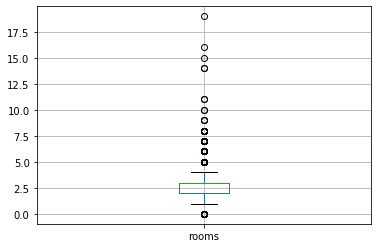

In [301]:
saint_petersburg_downtown_data.boxplot(column='rooms')

In [302]:
print(saint_petersburg_downtown_data['rooms'].min())
print(saint_petersburg_downtown_data['rooms'].max())
print(len(saint_petersburg_downtown_data['rooms'].unique()))

0
19
16


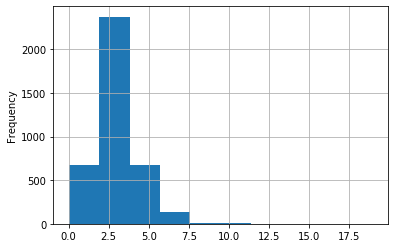

In [303]:
saint_petersburg_downtown_data['rooms'].plot(kind='hist', label='rooms', bins=10, grid=True)

### Most houses have between 1 and 7 rooms.

## ceiling_height

In [304]:
saint_petersburg_downtown_data['ceiling_height'][saint_petersburg_downtown_data['ceiling_height'] != -1].describe()

count    2525.000000
mean        3.079889
std         1.027169
min         2.000000
25%         2.800000
50%         3.000000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

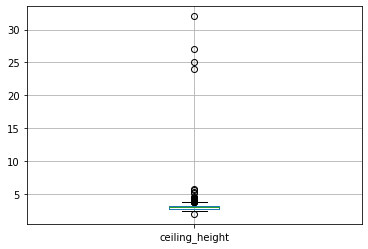

In [305]:
saint_petersburg_downtown_data[saint_petersburg_downtown_data['ceiling_height'] != -1].boxplot(column='ceiling_height')

In [306]:
print(saint_petersburg_downtown_data['ceiling_height'][saint_petersburg_downtown_data['ceiling_height'] != -1].min())
print(saint_petersburg_downtown_data['ceiling_height'][saint_petersburg_downtown_data['ceiling_height'] != -1].max())
print(len(saint_petersburg_downtown_data['ceiling_height'][saint_petersburg_downtown_data['ceiling_height'] != -1].unique()))

2.0
32.0
148


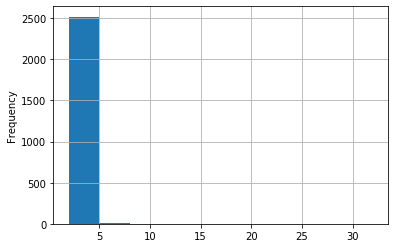

In [307]:
saint_petersburg_downtown_data['ceiling_height'][saint_petersburg_downtown_data['ceiling_height'] != -1].plot(kind='hist', label='ceiling_height' , bins=10, grid=True)

### ceiling_height is most commonly under 5m in Saint Petersburg.

# Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?

In [308]:
saint_petersburg_downtown_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,area_ratio_living_total,area_ratio_kitchen_total,cityCenters_nearest_km,distance_to_downtown_km
total_images,1.000000,0.144298,0.072828,0.042330,0.080531,-0.056451,0.075804,-0.000806,0.015641,-0.021367,...,-0.001981,-0.072824,0.168972,0.005569,-0.005701,0.150895,0.064284,0.085029,-0.025189,-0.025189
last_price,0.144298,1.000000,0.854980,0.530861,0.082087,0.052090,0.600441,0.140883,0.064328,-0.044575,...,-0.027734,0.042398,0.442455,-0.006942,-0.008744,-0.011734,-0.071730,-0.044780,-0.074247,-0.074247
total_area,0.072828,0.854980,1.000000,0.758561,0.088370,-0.047160,0.770223,0.056943,0.048018,-0.061256,...,-0.045782,0.072163,0.014352,-0.003664,-0.010041,-0.059897,-0.021830,-0.070354,-0.130617,-0.130617
rooms,0.042330,0.530861,0.758561,1.000000,0.095576,-0.205934,0.755643,-0.080843,0.009540,-0.127771,...,-0.054615,0.076517,-0.198801,-0.019356,-0.021289,-0.053657,0.129036,-0.054179,-0.187982,-0.187982
ceiling_height,0.080531,0.082087,0.088370,0.095576,1.000000,-0.145511,0.141927,-0.090170,0.072991,0.026847,...,-0.056485,0.006701,0.018939,-0.077719,-0.034894,0.141614,0.118773,0.087330,-0.053030,-0.053030
floors_total,-0.056451,0.052090,-0.047160,-0.205934,-0.145511,1.000000,-0.155079,0.675566,-0.010863,0.016589,...,0.077493,0.010090,0.240400,0.031777,0.010111,-0.025803,-0.152667,0.009258,0.381077,0.381077
living_area,0.075804,0.600441,0.770223,0.755643,0.141927,-0.155079,1.000000,-0.041869,0.050173,-0.040347,...,-0.040730,0.087072,-0.093943,-0.032616,-0.010093,-0.084753,0.482004,0.171661,-0.139201,-0.139201
floor,-0.000806,0.140883,0.056943,-0.080843,-0.090170,0.675566,-0.041869,1.000000,-0.006731,-0.019832,...,0.041739,0.002500,0.223584,0.031993,0.006377,-0.018181,-0.108133,0.005858,0.246814,0.246814
is_apartment,0.015641,0.064328,0.048018,0.009540,0.072991,-0.010863,0.050173,-0.006731,1.000000,-0.003299,...,-0.005693,0.012214,0.024028,-0.030246,0.005506,0.004106,0.003073,-0.039914,-0.004435,-0.004435
studio,-0.021367,-0.044575,-0.061256,-0.127771,0.026847,0.016589,-0.040347,-0.019832,-0.003299,1.000000,...,0.022078,-0.022843,0.024256,0.007717,0.013328,0.016302,0.020873,-0.207556,0.019754,0.019754


### total_area, living_area, and rooms seem to have the most affect on price.

## rooms

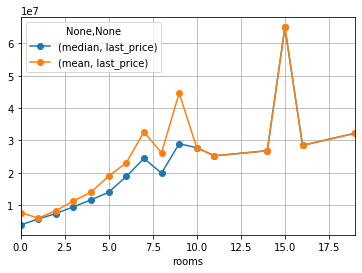

In [309]:
saint_petersburg_downtown_data.pivot_table(index=['rooms'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### A number of rooms increases, price increases, just as in general data. We also have outliers here above 7 rooms, since not so many people have homes with that many rooms.


## floor rank

In [310]:
saint_petersburg_downtown_data.pivot_table(index=['floor_comparison_to_total'], values='last_price', aggfunc=['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
floor_comparison_to_total,,,
first,6300000,7.757380e+06,423
last,8700000,1.203300e+07,647
other,8900000,1.099824e+07,2802


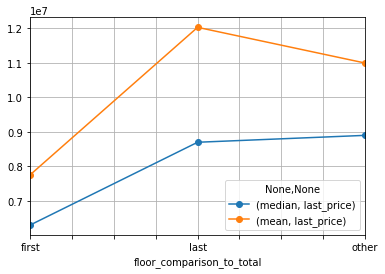

In [311]:
saint_petersburg_downtown_data.pivot_table(index=['floor_comparison_to_total'], values='last_price', aggfunc=['median', 'mean']).plot( style='o-', grid=True)

### It seems that if some lives on the first floor, it costs less than if someone lives on the last floor, just as in the general data.

## cityCenters_nearest

In [312]:
saint_petersburg_downtown_data['cityCenters_nearest_km'] = saint_petersburg_downtown_data['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [313]:
saint_petersburg_downtown_data['cityCenters_nearest_km'] = saint_petersburg_downtown_data['cityCenters_nearest_km'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


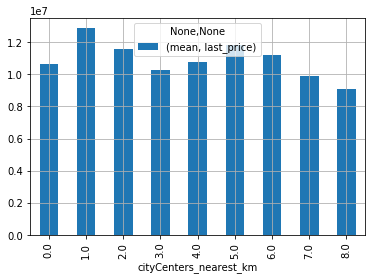

In [314]:
saint_petersburg_downtown_data.pivot_table(index=['cityCenters_nearest_km'], values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True)

### It seems that the price of homes inside downtown Saint Petersburg is pretty constant. However, homes near the edge of downtown seem to be slightly cheaper.

## day_of_week

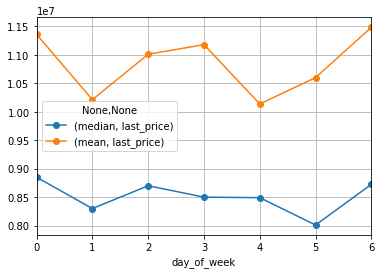

In [315]:
saint_petersburg_downtown_data.pivot_table(index=['day_of_week'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### It is unlikely that this factor plays a big role and there is no positive nor negative trend. It seems pretty random and not connected.

## month

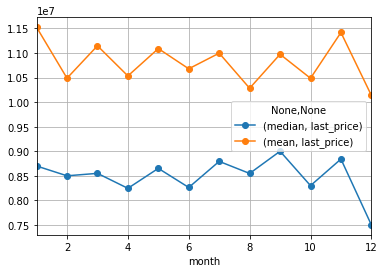

In [316]:
saint_petersburg_downtown_data.pivot_table(index=['month'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### Mostly, this seems pretty constant. However, if the advertisement is published in December, the price is lowest. This could be because of lower supply and demand in December when compared to others. There is not a clear increasing or decreasing trend as the year goes on.

## year

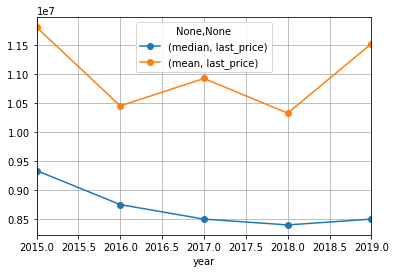

In [317]:
saint_petersburg_downtown_data.pivot_table(index=['year'], values='last_price', aggfunc=['median', 'mean']).plot(style='o-', grid=True)

### Prices have decreased from 2015 to 2018. However, they have been increasing since then. In the general data, this was slightly different. In the general data, prices have been increasing from 2017 to 2019.

### The factors with the largest influence on a home's value in Saint Petersburg is the number of rooms. It also matters whether the home is on first or last floor and the year. However, unlike in the rest of the data, the distance to the city center is no longer as big of a factor.

<div class="alert alert-success" role="alert">
Good piece of analysis
</div>

### Step 5. Overall conclusion

## The factors that impact price are different for the general data and for specifically Saint Petersburg downtown. In Saint Petersburg downtown, the number of rooms becomes more important. This could be because there are smaller houses in downtown so splitting the home up into more rooms matters. In the general data, the distance to the city center made a difference in price. In the Saint Petersburg downtown data, t

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [X]  files explored (first rows printed, info() method)
- [X]  missing values determined
- [X]  missing values filled in
- [X]  clarification of the discovered missing values provided
- [X]  data types converted
- [X]  explanation of which columns had the data types changed and why
- [X]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [X]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [X]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [X]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [X]  histograms for each parameter created
- [X]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [X]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [X]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [X]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [X]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [X]  each stage has a conclusion
- [X]  overall conclusion drawn